In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import datetime
import time

from sklearn.cluster import KMeans
from sklearn.manifold import TSNE

In [76]:
data = pd.read_csv('/Users/quents/Documents/git/SD201/shuffled_data.csv')
data.drop(columns = data.columns[0], inplace=True)
data.dropna(inplace=True)
data


,Date,Airline,Origin,Destination,DepTime,DepDelay,ArrTime,ArrDelay,AirTime,Distance,FlightNumber
0,2018-01-04,Delta Air Lines Inc.,MSP,MCO,1315.0,0.0,1710.0,0.0,148.0,1310.0,1487
1,2018-01-04,Delta Air Lines Inc.,ORD,ATL,1618.0,0.0,1903.0,0.0,82.0,606.0,1612
2,2018-01-15,Delta Air Lines Inc.,SLC,SEA,1117.0,0.0,1207.0,0.0,91.0,689.0,1099
3,2018-01-15,Delta Air Lines Inc.,ATL,CAK,942.0,0.0,1117.0,0.0,76.0,528.0,1190
4,2018-01-15,Delta Air Lines Inc.,ATL,HOU,1402.0,3.0,1513.0,0.0,115.0,696.0,1398
...,...,...,...,...,...,...,...,...,...,...,...
9995,2022-03-28,Alaska Airlines Inc.,ORD,PDX,1611.0,0.0,1831.0,0.0,239.0,1739.0,669
9996,2022-03-29,Alaska Airlines Inc.,SEA,SAN,957.0,7.0,1251.0,16.0,144.0,1050.0,1176
9997,2022-03-30,Alaska Airlines Inc.,OTZ,ANC,1135.0,0.0,1302.0,0.0,76.0,548.0,154
9998,2022-03-30,Alaska Airlines Inc.,SFO,EWR,749.0,4.0,1605.0,0.0,291.0,2565.0,183


In [77]:
def convertTime(str_time):
    timestamp = datetime.datetime.strptime(str_time,"%Y-%m-%d")
    tuple = timestamp.timetuple()
    timestamp = time.mktime(tuple)

    return(timestamp)

In [78]:
data['Date'] = data['Date'].apply(convertTime)
data

,Date,Airline,Origin,Destination,DepTime,DepDelay,ArrTime,ArrDelay,AirTime,Distance,FlightNumber
0,1.515020e+09,Delta Air Lines Inc.,MSP,MCO,1315.0,0.0,1710.0,0.0,148.0,1310.0,1487
1,1.515020e+09,Delta Air Lines Inc.,ORD,ATL,1618.0,0.0,1903.0,0.0,82.0,606.0,1612
2,1.515971e+09,Delta Air Lines Inc.,SLC,SEA,1117.0,0.0,1207.0,0.0,91.0,689.0,1099
3,1.515971e+09,Delta Air Lines Inc.,ATL,CAK,942.0,0.0,1117.0,0.0,76.0,528.0,1190
4,1.515971e+09,Delta Air Lines Inc.,ATL,HOU,1402.0,3.0,1513.0,0.0,115.0,696.0,1398
...,...,...,...,...,...,...,...,...,...,...,...
9995,1.648418e+09,Alaska Airlines Inc.,ORD,PDX,1611.0,0.0,1831.0,0.0,239.0,1739.0,669
9996,1.648505e+09,Alaska Airlines Inc.,SEA,SAN,957.0,7.0,1251.0,16.0,144.0,1050.0,1176
9997,1.648591e+09,Alaska Airlines Inc.,OTZ,ANC,1135.0,0.0,1302.0,0.0,76.0,548.0,154
9998,1.648591e+09,Alaska Airlines Inc.,SFO,EWR,749.0,4.0,1605.0,0.0,291.0,2565.0,183


Need to create a dictionnary with a float corresponding to an Airline, Origin and Destination

In [82]:
airlines = data['Airline'].unique()


origins = data['Origin'].unique()
destinations = data['Destination'].unique()
airports = np.unique(np.concatenate([origins, destinations]))

# print(airports)
# print(origins)
# print(destinations)

def convertAirlines(airline):
    return(np.where(airlines == airline)[0][0])

def convertAirport(airport):
    return(np.where(airports == airport)[0][0])

data['Airline'] = data['Airline'].apply(convertAirlines)

data['Origin'] = data['Origin'].apply(convertAirport)
data['Destination'] = data['Destination'].apply(convertAirport)

data_cluster = data.drop(columns=['DepDelay', 'ArrDelay', 'ArrTime', 'AirTime'])
data_cluster



,Date,Airline,Origin,Destination,DepTime,Distance,FlightNumber
0,1.515020e+09,0,217,193,1315.0,1310.0,1487
1,1.515020e+09,0,229,18,1618.0,606.0,1612
2,1.515971e+09,0,288,278,1117.0,689.0,1099
3,1.515971e+09,0,18,53,942.0,528.0,1190
4,1.515971e+09,0,18,139,1402.0,696.0,1398
...,...,...,...,...,...,...,...
9995,1.648418e+09,4,229,237,1611.0,1739.0,669
9996,1.648505e+09,4,278,269,957.0,1050.0,1176
9997,1.648591e+09,4,232,14,1135.0,548.0,154
9998,1.648591e+09,4,279,105,749.0,2565.0,183


In [83]:

tsne = TSNE(3, random_state=53)             #53 correspond au random state avec le moins d'inertie (erreur)
tsne_result = tsne.fit_transform(data_cluster)

# print(tsne_result.shape)

km = KMeans(
n_clusters=13, init='k-means++',
n_init=10, max_iter=300, 
tol=1e-04, random_state=0)

y_km = km.fit_predict(tsne_result)


/opt/homebrew/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [84]:


fte_colors = {
        0: "#FF4E33",
        1: "#FF9633",
        2: "#FFEA33",
        3: "#94FF33",
        4: "#278C20",
        5: "#12DB8A",
        6: "#12DBD6",
        7: "#10AADB",
        8: "#0C67C3",
        9: "#0F21AF",
        10: "#8C2AE7",
        11: "#B213E7",
        12: "#E713E0",
        13: "#E6207A"
    }

km_colors = [fte_colors[label] for label in km.labels_]

clusters = [[]]*(max(km.labels_)+1)

print(tsne_result)

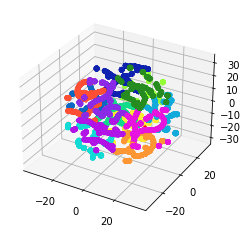

In [85]:
count = 0
for i in range(km.labels_.shape[0] - 1):
    point = list(tsne_result[i])
    clusters[km.labels_[i]].append(point)
    if km.labels_[i] == 1:
        count += 1



fig = plt.figure(1)
ax = fig.add_subplot(projection='2d')

ax.scatter(tsne_result[:,0], tsne_result[:,1], tsne_result[:,2], c = km_colors, marker = 'o')
ax.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], km.cluster_centers_[:, 2], c = 'red', marker = '+')

plt.show()